In [1]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

In [2]:
Cars=pd.read_csv("public_cars.csv")
Cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


In [3]:
s=Cars['model_name'].value_counts()
s=s[s<=10]
Rare_modeles=list(s.index)

In [4]:

Cars["Model"] = Cars["model_name"].apply(lambda x: x if x not in Rare_modeles
                            
                                            else "Rare car")


In [5]:
Cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd,Model
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,7,4250.0,Fusion
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,133,4000.0,Caravan
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,True,False,False,True,True,True,True,0,10900.0,Galaxy
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,False,False,True,False,False,True,True,20,6999.0,6
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,True,160,1600.0,80


In [6]:
Cars['Model'].value_counts()

Rare car    2334
Passat      1153
Astra        595
Golf         577
A6           546
            ... 
Saxo          11
Tipo          11
Picnic        11
Grandis       11
328           11
Name: Model, Length: 436, dtype: int64

In [7]:
Ncars=Cars.drop(columns=['duration_listed','model_name','engine_fuel','engine_has_gas','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'])

In [8]:
Ncars.columns

Index(['manufacturer_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_type', 'engine_capacity', 'body_type',
       'has_warranty', 'state', 'drivetrain', 'price_usd', 'Model'],
      dtype='object')

In [9]:
Ncars.isnull().any()

manufacturer_name    False
transmission         False
color                False
odometer_value       False
year_produced        False
engine_type          False
engine_capacity       True
body_type            False
has_warranty         False
state                False
drivetrain           False
price_usd            False
Model                False
dtype: bool

In [10]:
Ncars.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,Model
0,Ford,mechanical,blue,245000,2006,gasoline,1.6,hatchback,False,owned,front,4250.0,Fusion
1,Dodge,automatic,silver,265542,2002,gasoline,3.3,minivan,False,owned,front,4000.0,Caravan
2,Ford,mechanical,blue,168000,2009,diesel,1.8,minivan,False,owned,front,10900.0,Galaxy
3,Mazda,mechanical,other,225522,2008,gasoline,1.8,universal,False,owned,front,6999.0,6
4,Audi,mechanical,black,370000,1991,gasoline,1.8,sedan,False,owned,front,1600.0,80


In [11]:
Ncars["engine_capacity"].isnull().sum()

8

In [12]:
Ncars.corr()

,odometer_value,year_produced,engine_capacity,has_warranty,price_usd
odometer_value,1.000000,-0.489075,0.106547,-0.193486,-0.419563
year_produced,-0.489075,1.000000,0.007581,0.213130,0.707470
engine_capacity,0.106547,0.007581,1.000000,-0.057139,0.296313
has_warranty,-0.193486,0.213130,-0.057139,1.000000,0.288283
price_usd,-0.419563,0.707470,0.296313,0.288283,1.000000


In [13]:
Ncars.shape

(30824, 13)

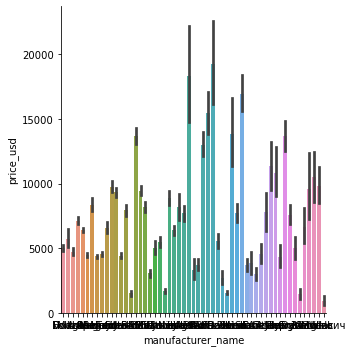

In [14]:
sns.catplot(data=Ncars, x='manufacturer_name', y='price_usd', kind="bar")

In [15]:
Ncars.columns

Index(['manufacturer_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_type', 'engine_capacity', 'body_type',
       'has_warranty', 'state', 'drivetrain', 'price_usd', 'Model'],
      dtype='object')

In [16]:
Ncars['price_usd'].value_counts()

1500.00     507
3500.00     468
2000.00     444
1000.00     437
2500.00     432
           ... 
5193.02       1
16954.38      1
16455.93      1
501.52        1
2015.56       1
Name: price_usd, Length: 2379, dtype: int64

In [17]:
# Separate target variable Y from features X
## Choose the columns you want to have as your features
features_list = ['manufacturer_name', 'Model', 'transmission', 'color',
       'odometer_value', 'year_produced',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain']

print("Splitting dataset into X and y...")
X = Ncars.loc[:,features_list] # We add feature_list into our loc 

y = Ncars.loc[:,"price_usd"] # We set "Purchased" as the target variable
print("...Done.")


Splitting dataset into X and y...
...Done.


In [18]:
features_list

['manufacturer_name',
 'Model',
 'transmission',
 'color',
 'odometer_value',
 'year_produced',
 'engine_type',
 'engine_capacity',
 'body_type',
 'has_warranty',
 'state',
 'drivetrain']

In [19]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, stratify=Cars['Model'])

print("...Done.")    

Splitting dataset into train set and test set...
...Done.


In [20]:
type(X_train)

pandas.core.frame.DataFrame

In [21]:
# Missing values
print("Imputing missing values...")
print(X_train)
print()
imputer = SimpleImputer(strategy="median", missing_values=np.nan) # Instanciate class of SimpleImputer with strategy of mean
X_train = X_train.copy() # Copy dataset to avoid caveats of assign a copy of a slice of a DataFrame
                        # More info here https://towardsdatascience.com/explaining-the-settingwithcopywarning-in-pandas-ebc19d799d25

X_train[["engine_capacity"]] = imputer.fit_transform(X_train[["engine_capacity"]]) # Fit and transform columns where there are missing values
print("...Done!")
print(X_train) 
print()

Imputing missing values...
      manufacturer_name     Model transmission   color  odometer_value  \
16181        Mitsubishi    Lancer    automatic   black          200000   
12724             Volvo       V40   mechanical    grey          200000   
22914             Skoda   Octavia    automatic    grey          184110   
29662           Renault    Laguna   mechanical    grey          160000   
17496              Opel    Vectra    automatic   black          190000   
...                 ...       ...          ...     ...             ...   
12887             Volvo       V70    automatic  silver          764823   
10595           Peugeot       406   mechanical    blue          340000   
11506           Renault    Scenic   mechanical    blue          315000   
22156           Citroen    Xantia    automatic   black          320000   
17167            Jaguar  Rare car    automatic    blue           61790   

       year_produced engine_type  engine_capacity  body_type  has_warranty  \
16181 

In [22]:
X_train.isnull().any()

manufacturer_name    False
Model                False
transmission         False
color                False
odometer_value       False
year_produced        False
engine_type          False
engine_capacity      False
body_type            False
has_warranty         False
state                False
drivetrain           False
dtype: bool

In [23]:
Ncars.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,Model
0,Ford,mechanical,blue,245000,2006,gasoline,1.6,hatchback,False,owned,front,4250.0,Fusion
1,Dodge,automatic,silver,265542,2002,gasoline,3.3,minivan,False,owned,front,4000.0,Caravan
2,Ford,mechanical,blue,168000,2009,diesel,1.8,minivan,False,owned,front,10900.0,Galaxy
3,Mazda,mechanical,other,225522,2008,gasoline,1.8,universal,False,owned,front,6999.0,6
4,Audi,mechanical,black,370000,1991,gasoline,1.8,sedan,False,owned,front,1600.0,80


In [24]:
# Encoding categorical features and standardizing numeric features
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables

# This is a list comprehension (too complex for students)

numeric_features = ['engine_capacity','odometer_value','year_produced',] # Choose which column index we are going to scale


numeric_transformer = StandardScaler()


categorical_features = ['manufacturer_name', 'transmission', 'color',
       'engine_type','body_type', 'has_warranty', 'state',
       'drivetrain', 'Model'] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()



#### X_train BEFORE preprocessing ####
      manufacturer_name    Model transmission  color  odometer_value  \
16181        Mitsubishi   Lancer    automatic  black          200000   
12724             Volvo      V40   mechanical   grey          200000   
22914             Skoda  Octavia    automatic   grey          184110   
29662           Renault   Laguna   mechanical   grey          160000   
17496              Opel   Vectra    automatic  black          190000   

       year_produced engine_type  engine_capacity  body_type  has_warranty  \
16181           2005    gasoline              2.0      sedan         False   
12724           2015      diesel              2.0  hatchback         False   
22914           2011    gasoline              1.4   liftback         False   
29662           2002      diesel              2.2  hatchback         False   
17496           2008    gasoline              1.8  hatchback         False   

       state drivetrain  
16181  owned      front  
12724  

In [25]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")


Train model...
...Done.


In [26]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[ 6005.28815435 12811.49353566  9925.07020339  5427.11477765
  8722.88947547]



In [27]:
X_test['engine_capacity'] = imputer.transform(X_test[['engine_capacity']])
X_test

,manufacturer_name,Model,transmission,color,odometer_value,year_produced,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain
2975,Volkswagen,Passat,mechanical,black,345000,1992,diesel,1.9,sedan,False,owned,front
1664,Renault,Clio,mechanical,white,135000,2009,diesel,1.5,hatchback,False,owned,front
18246,Audi,100,automatic,silver,237000,1994,gasoline,2.8,sedan,False,owned,all
21497,Renault,Safrane,mechanical,blue,350000,1993,gasoline,2.2,hatchback,False,owned,front
6891,Audi,A6,automatic,blue,350000,2001,diesel,2.5,sedan,False,owned,front
...,...,...,...,...,...,...,...,...,...,...,...,...
11588,Mercedes-Benz,ML400,automatic,silver,300000,2002,diesel,4.0,suv,False,owned,all
10588,Mazda,323,mechanical,green,276000,1987,diesel,1.7,sedan,False,owned,front
24250,Volkswagen,Passat,automatic,silver,450000,2000,gasoline,1.8,universal,False,owned,front
29168,Mercedes-Benz,C180,automatic,black,0,2019,gasoline,1.6,sedan,False,new,rear


In [28]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()


--- Testing pipeline ---
Standardizing numerical features...
      manufacturer_name    Model transmission   color  odometer_value  \
2975         Volkswagen   Passat   mechanical   black          345000   
1664            Renault     Clio   mechanical   white          135000   
18246              Audi      100    automatic  silver          237000   
21497           Renault  Safrane   mechanical    blue          350000   
6891               Audi       A6    automatic    blue          350000   
...                 ...      ...          ...     ...             ...   
11588     Mercedes-Benz    ML400    automatic  silver          300000   
10588             Mazda      323   mechanical   green          276000   
24250        Volkswagen   Passat    automatic  silver          450000   
29168     Mercedes-Benz     C180    automatic   black               0   
19541              Fiat    Marea   mechanical    blue          290000   

       year_produced engine_type  engine_capacity  body_type  

In [29]:
# Predictions on testing set
print("Predictions on testing set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

print("Final accuracy score on Test set: ",regressor.score(X_test, y_test))

Predictions on testing set...
...Done.
[ 834.14592503 8084.16855863 7020.16563829 -558.39513194 6490.204096  ]

Final accuracy score on Test set:  0.7820190696207122


In [30]:
# Performance assessment
print("--- Assessing the performances of the model ---")
print("Final accuracy score on Test set : ",regressor.score(X_test, y_test))
print("Final accuracy score on Train set: ",regressor.score(X_train, y_train))

--- Assessing the performances of the model ---
Final accuracy score on Test set :  0.7820190696207122
Final accuracy score on Train set:  0.8020520382921037


In [89]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_test_pred)
print("=========================================")
print("MAE:",mae)
print('')
print("MSE:", mse)
print('')
print("RMSE:", rmse)
print('')
print("R²:", r2)
print("========================================")      

MAE: 1818.341278682941

MSE: 8764323.637831723

RMSE: 2960.46003820888

R²: 0.7820190696207122


In [31]:
# Check coefficients 
print("Constant is: ", regressor.intercept_)
print("coefficients are: ", regressor.coef_) 

print()

Constant is:  12494.113981819966
coefficients are:  [-5.00170681e+00 -8.56379168e+02  3.03617634e+03  4.84318584e+03
  3.28860877e+03 -8.79574051e+02 -7.15894627e+03 -7.70929162e+01
  4.32104738e+02 -2.38589591e+03 -1.53308286e+03 -1.01618528e+03
  3.19421955e+02 -1.85080958e+03 -7.81229611e+01 -5.76329198e+03
 -6.94484639e+03  1.92700456e+02 -1.82458650e+03  1.70247673e+03
  1.59495592e+03  1.05592934e+04 -1.03008376e+03 -2.40676092e+03
 -4.56419509e+03 -9.31851447e+02  1.43880115e+04  1.06024262e+04
 -5.90218838e+03  1.27416195e+03 -1.89343312e+02  4.29440199e+03
  2.51431017e+03 -6.81557107e+02  1.17110956e+02 -5.87387629e+02
 -3.46432301e+03  3.77423051e+02  1.42448894e+04 -2.80067459e+03
 -1.37850958e+03 -2.25039685e+03 -2.01851425e+03 -7.42049281e+03
 -3.21114819e+03 -1.18432261e+03 -3.45739952e+03  9.13400613e+02
  2.07434809e+03  1.54867149e+03 -3.11755784e+03  5.86108156e+02
 -4.20336155e+03  8.42871144e+03 -6.15901503e+03  2.54101443e+02
 -2.54101443e+02 -4.04589366e+01 -2.54

In [32]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), ['manufacturer_name', 'transmission', 'color', 'engine_type', 'body_type', 'has_warranty', 'state', 'drivetrain', 'Model']), ('num', StandardScaler(), ['engine_capacity', 'odometer_value', 'year_produced'])]
One Hot Encoder transformer is:  OneHotEncoder()


In [33]:
# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

numerical_column_names = X.loc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)


Categorical columns are:  [array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
       'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
       'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai',
       'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lancia',
       'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda',
       'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
       'ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ'], dtype=object), array(['automatic', 'mechanical'], dtype=object), array(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'other',
       'red', 'silver', 'violet', 'white', 'yellow'], dtype=object), array(['diesel', 'electric', 'gasoline'], dtype=object), array(['cabriolet', 'coupe', 'hatchback', 'liftback', 'limousine',
       'minibus', 'minivan', 'picku

In [34]:
# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
print("All columns name are: ", all_column_names)


All columns name are:  [array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
        'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai',
        'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lancia',
        'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda',
        'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
        'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda',
        'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
        'ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ'], dtype=object)
 array(['automatic', 'mechanical'], dtype=object)
 array(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'other',
        'red', 'silver', 'violet', 'white', 'yellow'], dtype=object)
 array(['diesel', 'electric', 'gasoline'], dtype=object)
 array(['cabriolet', 'coupe', 'hatchback', 'liftback', 'limousine',
        'minibus', 'minivan',

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4811: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(arr)


In [35]:
new_column_names = []

for arr in all_column_names:
    if isinstance(arr, (np.ndarray, np.generic)):
        new_column_names = new_column_names + list(arr)
    else:
        new_column_names.append(arr)

new_column_names

['Acura',
 'Alfa Romeo',
 'Audi',
 'BMW',
 'Buick',
 'Cadillac',
 'Chery',
 'Chevrolet',
 'Chrysler',
 'Citroen',
 'Dacia',
 'Daewoo',
 'Dodge',
 'Fiat',
 'Ford',
 'Geely',
 'Great Wall',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Iveco',
 'Jaguar',
 'Jeep',
 'Kia',
 'LADA',
 'Lancia',
 'Land Rover',
 'Lexus',
 'Lifan',
 'Lincoln',
 'Mazda',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Opel',
 'Peugeot',
 'Pontiac',
 'Porsche',
 'Renault',
 'Rover',
 'Saab',
 'Seat',
 'Skoda',
 'SsangYong',
 'Subaru',
 'Suzuki',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'ВАЗ',
 'ГАЗ',
 'ЗАЗ',
 'Москвич',
 'УАЗ',
 'automatic',
 'mechanical',
 'black',
 'blue',
 'brown',
 'green',
 'grey',
 'orange',
 'other',
 'red',
 'silver',
 'violet',
 'white',
 'yellow',
 'diesel',
 'electric',
 'gasoline',
 'cabriolet',
 'coupe',
 'hatchback',
 'liftback',
 'limousine',
 'minibus',
 'minivan',
 'pickup',
 'sedan',
 'suv',
 'universal',
 'van',
 False,
 True,
 'emergency',
 'new',
 'owned',
 'all',
 'front',
 'rear'

In [36]:
print(type(new_column_names),type(regressor.coef_))

<class 'list'> <class 'numpy.ndarray'>


In [37]:
print(len(regressor.coef_),len(new_column_names))

531 531


In [38]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": new_column_names ,
    "coefficients":regressor.coef_
})

In [39]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

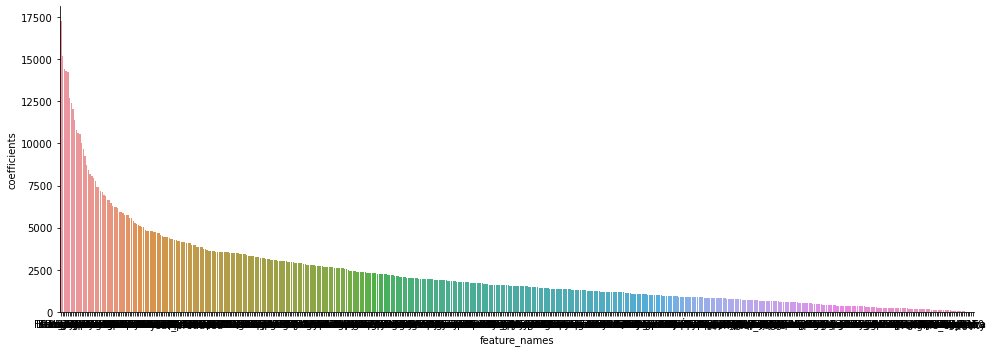

In [65]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=25/9) # Resize graph


In [58]:
Constructeurs=Ncars.groupby(by="manufacturer_name").agg({"price_usd":np.mean})
Constructeurs.head()

,price_usd
manufacturer_name,
Acura,11333.129400
Alfa Romeo,2721.640000
Audi,7121.501476
BMW,9451.773864
Buick,12998.200000


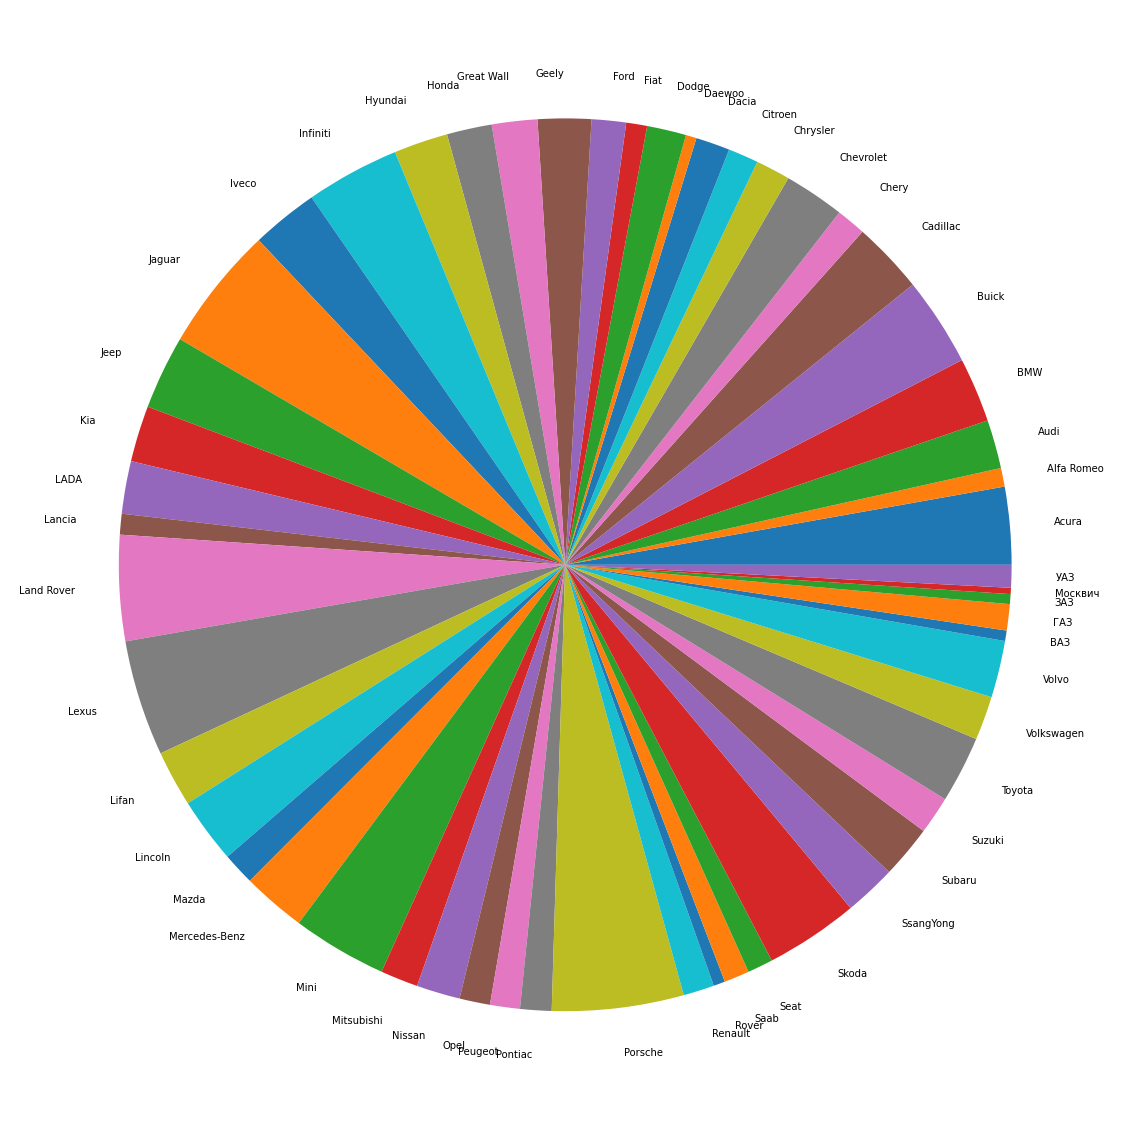

In [63]:
cars = Constructeurs.index
data = Constructeurs['price_usd']
# Creating plot
fig = plt.figure(figsize =(20,30))
plt.pie(data, labels = cars)
# show plot
plt.show()

import matplotlib.pyplot as plt

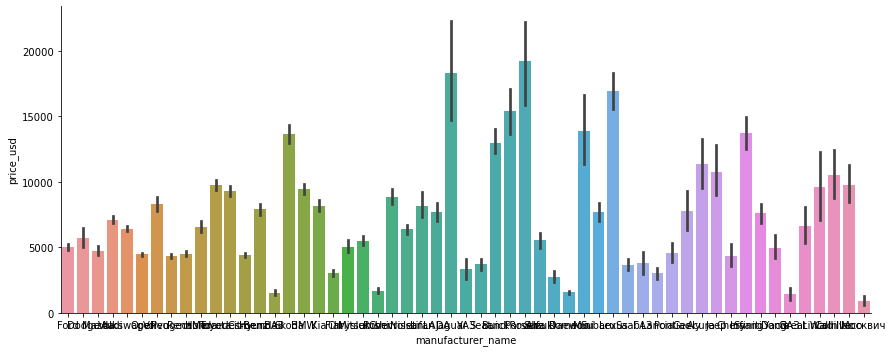

In [66]:
sns.catplot(data=Ncars, x='manufacturer_name', y='price_usd', kind="bar",aspect=2.5)

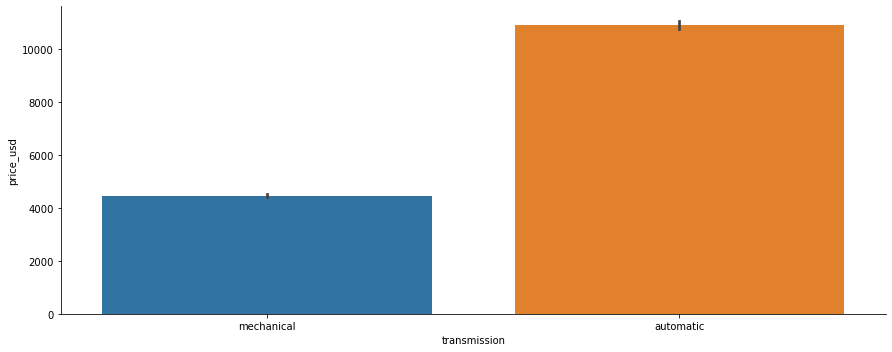

In [67]:
sns.catplot(data=Ncars, x='transmission', y='price_usd', kind="bar",aspect=2.5)

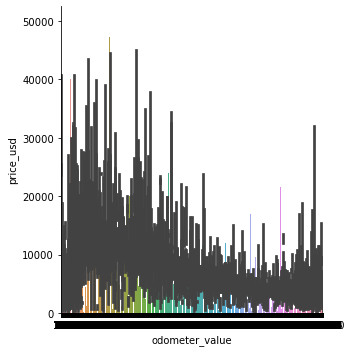

In [82]:
sns.catplot(data=Ncars, x='odometer_value', y='price_usd', kind="bar")

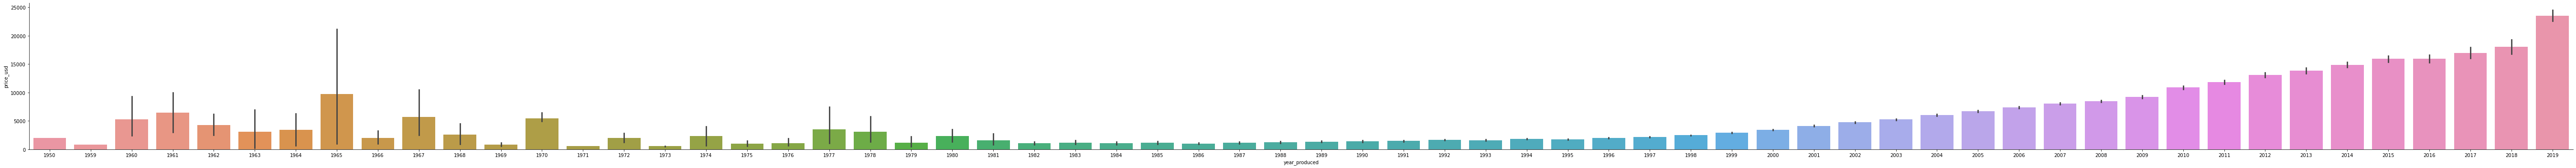

In [78]:
sns.catplot(data=Ncars, x='year_produced', y='price_usd', kind="bar",aspect=15)

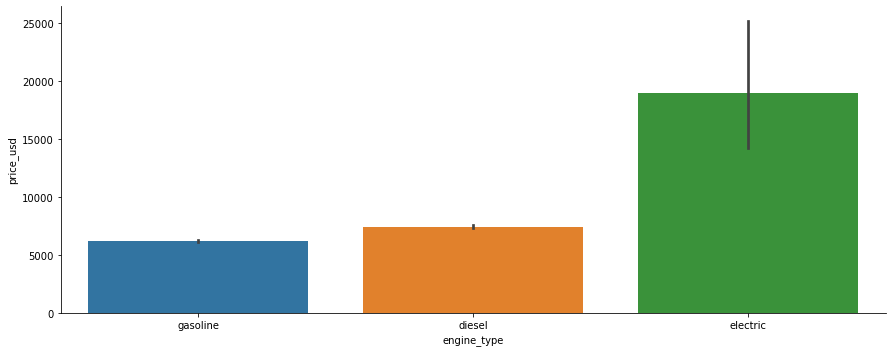

In [70]:
sns.catplot(data=Ncars, x='engine_type', y='price_usd', kind="bar",aspect=2.5)

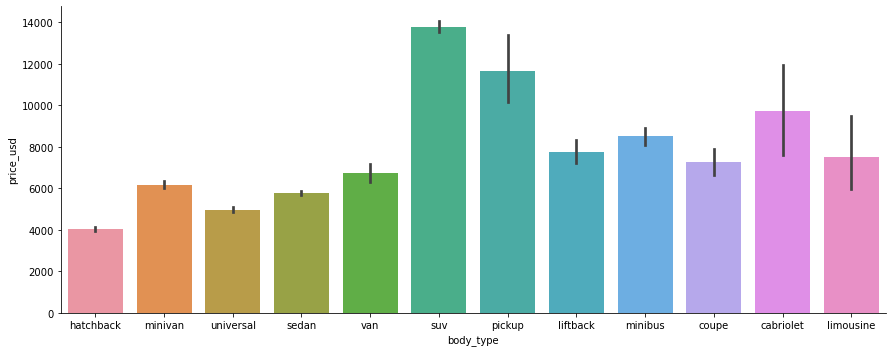

In [71]:
sns.catplot(data=Ncars, x='body_type', y='price_usd', kind="bar",aspect=2.5)

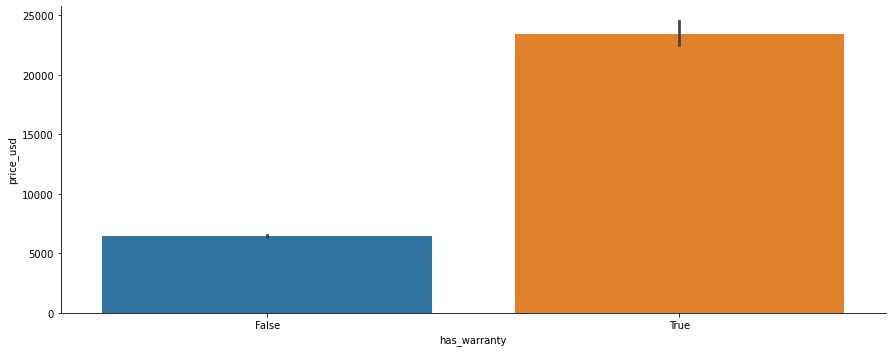

In [72]:
sns.catplot(data=Ncars, x='has_warranty', y='price_usd', kind="bar",aspect=2.5)

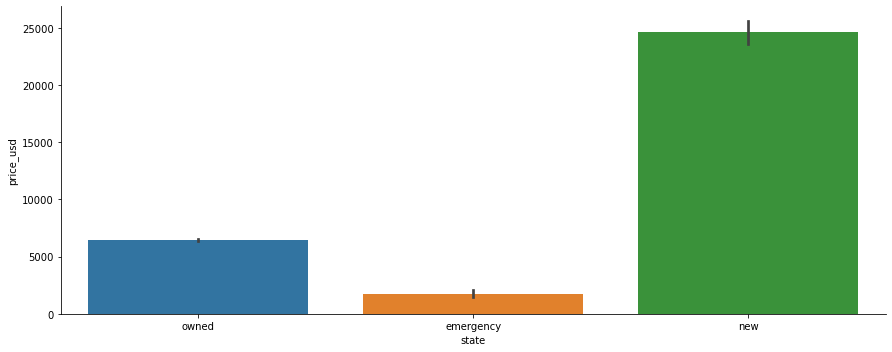

In [73]:
sns.catplot(data=Ncars, x='state', y='price_usd', kind="bar",aspect=2.5)

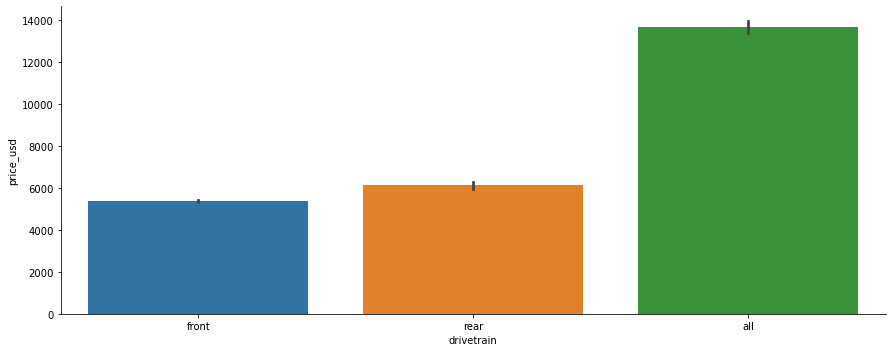

In [74]:
sns.catplot(data=Ncars, x='drivetrain', y='price_usd', kind="bar",aspect=2.5)

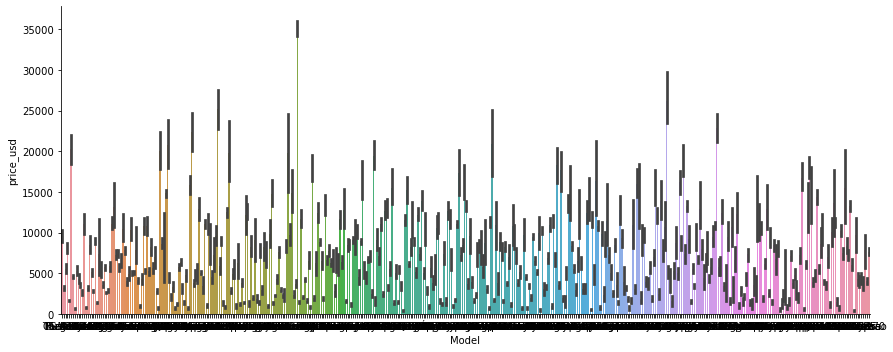

In [75]:
sns.catplot(data=Ncars, x='Model', y='price_usd', kind="bar",aspect=2.5)